In [ ]:
from glob import glob
import logging
import os
import pyglider.ncprocess as ncprocess
import pyglider.slocum as slocum
import pyglider.utils as pgutils
import xarray as xr


In [ ]:
# set up directories and file names

binarydir = './delayed_raw/'
rawdir = './delayed_rawnc/'
cacdir = './cac/'
sensorlist = './unit1230_sensors.txt'
deploymentyaml = './deployment.yml'
l1tsdir = './L0-timeseries/'
profiledir = './L0-profiles/'
griddir = './L0-gridfiles/'
scisuffix = 'ebd'
glidersuffix = 'dbd'

In [1]:
# # there were some bad profiles, used this code to find them - need to be deleted/moved to another folder manually 
# bad = []
# for fn in sorted(glob.glob("./delayed_rawnc/*.dbd.nc")):
#     try:
#         ds = xr.open_dataset(fn, decode_times=False)
#         zeros = {d:n for d,n in ds.dims.items() if n == 0}
#         if zeros:
#             bad.append((fn, zeros))
#         ds.close()
#     except Exception as e:
#         bad.append((fn, {"open_error": str(e)}))

# print("Total:", len(glob.glob("./delayed_rawnc/*.dbd.nc")))
# print("Bad :", len(bad))
# for fn, why in bad[:30]:
#     print(os.path.basename(fn), why)

# bad = {
#     "00670014.dbd.nc",
#     "00670112.dbd.nc",
#     "00700014.dbd.nc",
#     "00700023.dbd.nc",
#     "00700028.dbd.nc",
#     "00700091.dbd.nc",
#     "00700120.dbd.nc",
#     "00700122.dbd.nc",
# }

In [ ]:
# convert binary to raw netcdf
slocum.binary_to_rawnc(
    binarydir, rawdir, cacdir, sensorlist, deploymentyaml,
    incremental=True, scisuffix=scisuffix, glidersuffix=glidersuffix)

In [ ]:
#merge raw netcdf files
slocum.merge_rawnc(rawdir, rawdir, deploymentyaml,
                   scisuffix=scisuffix, glidersuffix=glidersuffix)

In [ ]:
# create a timeseries from raw files
outname = slocum.raw_to_timeseries(
    rawdir, l1tsdir, deploymentyaml,
    profile_filt_time=100, profile_min_time=300)

In [ ]:
# extract timeseries profiles 
ncprocess.extract_timeseries_profiles(outname, profiledir, deploymentyaml)

KeyError: "No variable named 'potential_density'. Variables on the dataset include ['profile_time_start', 'profile_time_end', 'heading', 'pitch', 'roll', ..., 'depth', 'profile', 'time', 'longitude', 'latitude']"

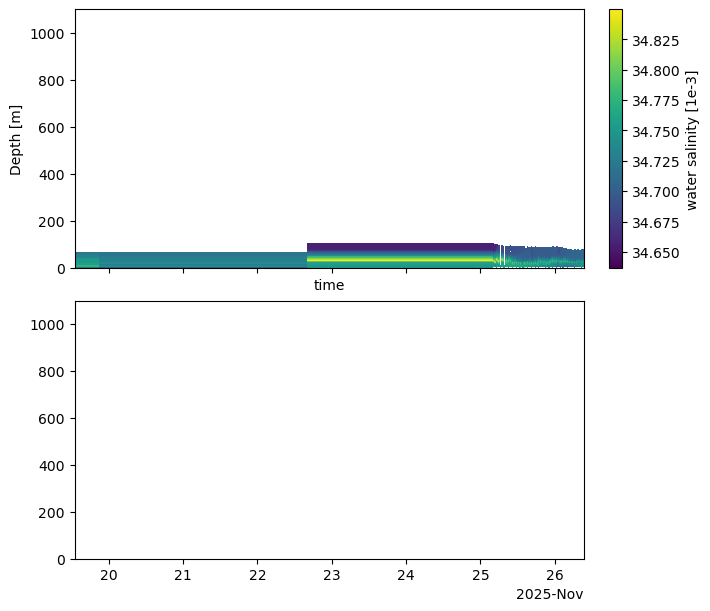

In [ ]:
# make gridfiles from profiles
outname2 = ncprocess.make_gridfiles(outname, griddir, deploymentyaml)

# example grid plot
# pgutils.example_gridplot(outname2, './gridplot2.png', ylim=[150, 0],
#                          toplot=['salinity','par',
#                                  ])
# example plot not working because expects potential density as a variable in the gridfile